In [1]:
import dask.dataframe as ddf
import pandas as pd
import os

In [2]:
EOD_2024=ddf.read_csv('Matriz_od_modo_censo_2024.csv')

In [ ]:
caenes = pd.read_csv(r'personas_censo2024\personas_censo2024.csv', sep=';', usecols=['cod_caenes'])

In [115]:
# Crear mapeo de códigos CAENES a significados
caenes_mapeo = {
    'A': 'Agricultura ganadería silvicultura y pesca',
    'B': 'Explotación de minas y canteras',
    'C': 'Industrias manufactureras',
    'D': 'Suministro de electricidad gas vapor y aire acondicionado',
    'E': 'Suministro de agua; evacuación de aguas residuales, gestión de desechos y descontaminación',
    'F': 'Construcción',
    'G': 'Comercio al por mayor y al por menor; reparación de vehículos automotores y motocicletas',
    'H': 'Transporte y almacenamiento',
    'I': 'Actividades de alojamiento y de servicio de comidas',
    'J': 'Información y comunicaciones',
    'K': 'Actividades financieras y de seguros',
    'L': 'Actividades inmobiliarias',
    'M': 'Actividades profesionales, científicas y técnicas',
    'N': 'Actividades de servicios administrativos y de apoyo',
    'O': 'Administración pública y defensa; planes de seguridad social de afiliación obligatoria',
    'P': 'Enseñanza',
    'Q': 'Actividades de atención de la salud humana y de asistencia social',
    'R': 'Actividades artísticas, de entretenimiento y recreativas',
    'S': 'Otras actividades de servicios',
    'T': 'Actividades de los hogares como empleadores; actividades no diferenciadas de los hogares como productores de bienes y servicios para uso propio',
    'U': 'Actividades de organizaciones y órganos extraterritoriales',
    '999': 'Respuesta no codificable',
    '-99': 'No respuesta',
    'NA': 'No aplica'
}

caenes['significado'] = caenes['cod_caenes'].map(caenes_mapeo)

In [3]:
cod_terr = pd.read_csv('cod_territoriales_especificos.csv', encoding='utf-8')
cod_terr.columns = ['codigo', 'nombre']
EOD_2024_pd = EOD_2024.compute() if hasattr(EOD_2024, 'compute') else EOD_2024

# Mapear comuna_origen
EOD_2024_pd = EOD_2024_pd.merge(
    cod_terr.rename(columns={'codigo': 'comuna_origen', 'nombre': 'nombre_origen'}),
    on='comuna_origen',
    how='left'
)

# Mapear comuna_destino
EOD_2024_pd = EOD_2024_pd.merge(
    cod_terr.rename(columns={'codigo': 'comuna_destino', 'nombre': 'nombre_destino'}),
    on='comuna_destino',
    how='left'
)

EOD_2024 = ddf.from_pandas(EOD_2024_pd, npartitions=4) if 'ddf' in str(type(EOD_2024)) else EOD_2024_pd

In [4]:
EOD_2024.head(10)

comuna_origen  comuna_destino  sexo  grupo_edad  medio_transp  n_personas  \
0           5802             998     1          50             2          31   
1           5802            5802     2          45             3         119   
2           4303            4303     1          55             2          73   
3           1101            1101     1          70             1         282   
4           1101            1101     1          45             2         871   
5          13124           13128     2          45             7           2   
6          13124           13128     1          45             7           5   
7           8111            8111     1          30             3          93   
8           8111            8111     2          30             1         211   
9          13101           13130     2          30             2         228   

  nombre_origen           nombre_destino  
0       Limache  Varias comunas o países  
1       Limache                  Limache  
2  Monte Patria             Monte Patria  
3       Iquique                  Iquique  
4       Iquique                  Iquique  
5      Pudahuel                    Renca  
6      Pudahuel                    Renca  
7          Tomé                     Tomé  
8          Tomé                     Tomé  
9      Santiago               San Miguel

In [5]:
EOD_2024 = EOD_2024.drop(columns=['comuna_origen', 'comuna_destino'])

In [6]:
comunas_rm = [
    "Cerrillos",
    "Cerro Navia",
    "Conchalí",
    "El Bosque",
    "Estación Central",
    "Huechuraba",
    "Independencia",
    "La Cisterna",
    "La Florida",
    "La Granja",
    "La Pintana",
    "La Reina",
    "Las Condes",
    "Lo Barnechea",
    "Lo Espejo",
    "Lo Prado",
    "Macul",
    "Maipú",
    "Ñuñoa",
    "Pedro Aguirre Cerda",
    "Peñalolén",
    "Providencia",
    "Pudahuel",
    "Quilicura",
    "Quinta Normal",
    "Recoleta",
    "Renca",
    "San Joaquín",
    "San Miguel",
    "San Ramón",
    "Vitacura",
    "Puente Alto",
    "Pirque",
    "San José de Maipo",
    "Colina",
    "Lampa",
    "Tiltil",
    "San Bernardo",
    "Buin",
    "Calera de Tango",
    "Paine",
    "Melipilla",
    "Alhué",
    "Curacaví",
    "María Pinto",
    "San Pedro",
    "Talagante",
    "El Monte",
    "Isla de Maipo",
    "Padre Hurtado",
    "Peñaflor",
    "Santiago"
]


In [7]:
EOD_2024 = EOD_2024[EOD_2024['nombre_destino'].isin(comunas_rm)]

In [8]:
folder = 'EOD_STGO'
viajes = pd.read_csv(os.path.join(folder, 'viajes.csv'), sep=';', encoding='utf-8')
personas = pd.read_csv(os.path.join(folder, 'personas.csv'), sep=';', encoding='utf-8')
edades = pd.read_csv(os.path.join(folder, 'Edadpersonas.csv'), sep=';', encoding='utf-8')
difusion = pd.read_csv(os.path.join(folder, 'ViajesDifusion.csv'), sep=';', encoding='utf-8')
comunas = pd.read_csv('EOD_STGO/Tablas_parametros/Comunas.csv', sep=',', encoding='utf-8')
comunas.columns = ['Id', 'Comuna']



In [9]:
df = viajes[['Hogar', 'Persona', 'Viaje', 'ComunaOrigen', 'ComunaDestino', 'Proposito', 'PropositoAgregado']]
df = df.merge(personas[['Hogar', 'Persona', 'Sexo']], on=['Hogar', 'Persona'], how='left')
df = df.merge(edades, on='Persona', how='left')
df = df.merge(difusion, on='Viaje', how='left')

In [10]:
resultado = df[['ComunaOrigen', 'ComunaDestino', 'Sexo', 'Edad', 'ModoDifusion', 'Proposito', 'PropositoAgregado']].copy()
resultado.columns = ['comuna_origen', 'comuna_destino', 'sexo', 'edad', 'difusion', 'proposito', 'proposito_agregado']


In [11]:
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, float('inf')]
labels = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
resultado['rango_edad'] = pd.cut(resultado['edad'], bins=bins, labels=labels, right=False)

In [12]:
resultado = resultado.merge(
    comunas.rename(columns={'Id': 'comuna_origen', 'Comuna': 'nombre_comuna_origen'}),
    on='comuna_origen',
    how='left'
)

resultado = resultado.merge(
    comunas.rename(columns={'Id': 'comuna_destino', 'Comuna': 'nombre_comuna_destino'}),
    on='comuna_destino',
    how='left'
)
resultado.drop(columns=['comuna_origen', 'comuna_destino','edad'], inplace=True)
resultado.head()

sexo  difusion  proposito  proposito_agregado rango_edad  \
0     2         2        7.0                 3.0         40   
1     1         2        1.0                 1.0         20   
2     1         2        7.0                 1.0         20   
3     2         2        1.0                 1.0         45   
4     2         2        7.0                 1.0         45   

  nombre_comuna_origen nombre_comuna_destino  
0                Maipú                 Maipú  
1                Maipú            Las Condes  
2           Las Condes                 Maipú  
3                Maipú                 Ñuñoa  
4                Ñuñoa                 Maipú

In [13]:
resultado = resultado[(resultado['proposito'] == 1.0) | (resultado['proposito'] == 2.0)& (resultado['proposito_agregado']==1.0) ]

In [14]:
resultado.head(5)

sexo  difusion  proposito  proposito_agregado rango_edad  \
1      1         2        1.0                 1.0         20   
3      2         2        1.0                 1.0         45   
12     2         1        1.0                 1.0         30   
23     1         7        1.0                 1.0         35   
27     2         4        1.0                 1.0         35   

   nombre_comuna_origen nombre_comuna_destino  
1                 Maipú            Las Condes  
3                 Maipú                 Ñuñoa  
12                Maipú                 Maipú  
23                Maipú              Pudahuel  
27                Maipú              Santiago

In [15]:
resultado=resultado.drop(columns=['proposito_agregado','proposito'])

In [16]:
columnas = ['sexo', 'rango_edad', 'difusion', 'nombre_comuna_origen', 'nombre_comuna_destino']

resultado_agrupado = (resultado[columnas]
                      .value_counts()
                      .reset_index(name='n_personas'))

In [17]:
resultado_agrupado.head(10)

sexo rango_edad  difusion nombre_comuna_origen nombre_comuna_destino  \
0     1         30         8             Santiago              Santiago   
1     1         25         8             Santiago              Santiago   
2     1         45         8             Santiago              Santiago   
3     2         30         8             Santiago              Santiago   
4     1         35         8             Santiago              Santiago   
5     2         40         8             Santiago              Santiago   
6     1         50         8             Santiago              Santiago   
7     2         20         2                Maipú              Santiago   
8     1         35         1           Las Condes            Las Condes   
9     1         30         2                Maipú              Santiago   

   n_personas  
0          34  
1          26  
2          25  
3          25  
4          25  
5          21  
6          20  
7          19  
8          19  
9          18

In [18]:
EOD_2024=EOD_2024[['sexo', 'grupo_edad', 'medio_transp', 'nombre_origen', 'nombre_destino', 'n_personas']]

In [19]:
EOD_2024.head(10)

sexo  grupo_edad  medio_transp  nombre_origen nombre_destino  n_personas
5      2          45             7       Pudahuel          Renca           2
6      1          45             7       Pudahuel          Renca           5
9      2          30             2       Santiago     San Miguel         228
10     2          40             2  Isla de Maipo      Talagante          32
11     1          55             2       Pudahuel          Maipú          72
18     2          45             2     Huechuraba     Huechuraba         158
19     1          20             2     Huechuraba     Las Condes          68
20     2          40             2          Maipú      Quilicura          65
21     2          25             2  Quinta Normal    Providencia         306
24     1          75             2    Providencia       Santiago          37

In [20]:
EOD_2024.to_parquet('EOD_2024_RM.parquet', engine='pyarrow', compression='snappy')
resultado.to_parquet('resultado_EOD.parquet', engine='pyarrow', compression='snappy')

## Matriz Sankey Flow para Censo 2025

In [21]:
from sankeyflow import Sankey
import matplotlib.pyplot as plt

### Diagrama Sankey para EOD 2024 (Censo)

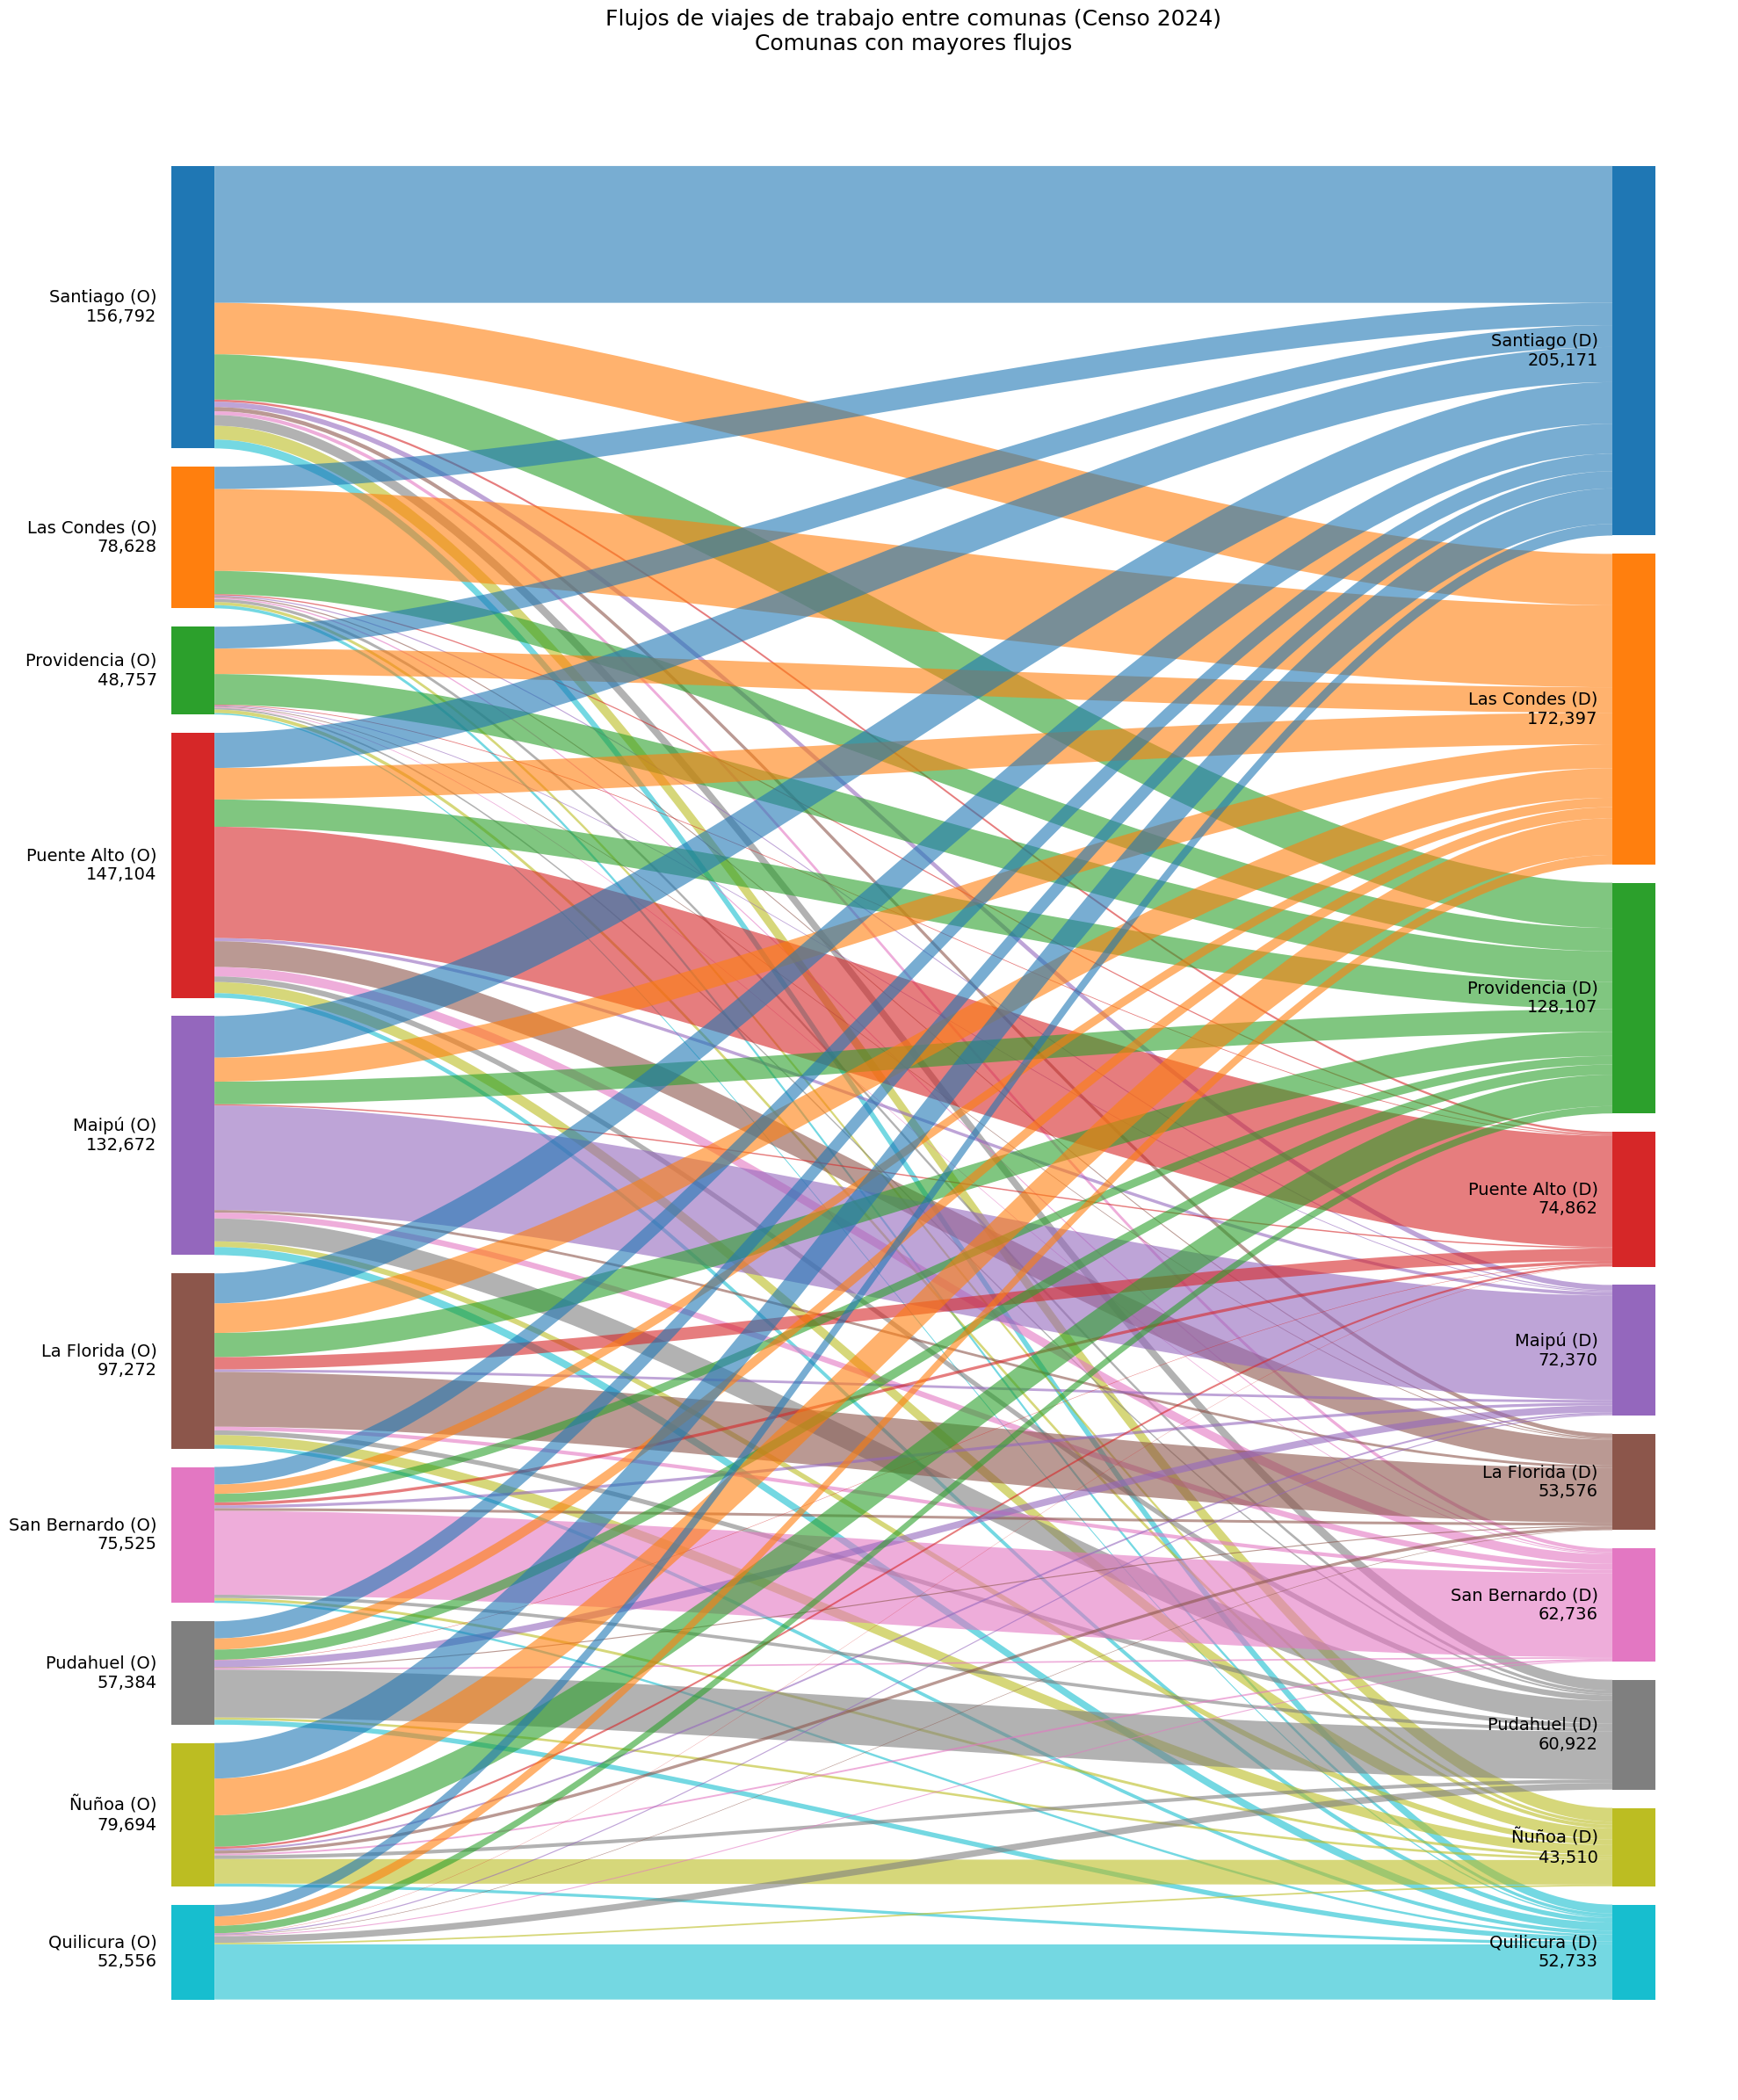

In [ ]:
flujo_comunas_2024 = EOD_2024.groupby(['nombre_origen', 'nombre_destino'])['n_personas'].sum().reset_index()
flujo_total_comunas = pd.concat([
    flujo_comunas_2024.groupby('nombre_origen')['n_personas'].sum(),
    flujo_comunas_2024.groupby('nombre_destino')['n_personas'].sum()
]).groupby(level=0).sum().sort_values(ascending=False)
comunas_top = flujo_total_comunas.nlargest(10).index.tolist()
flujo_filtrado = flujo_comunas_2024[
    flujo_comunas_2024['nombre_origen'].isin(comunas_top) &
    flujo_comunas_2024['nombre_destino'].isin(comunas_top)
].copy()
flujo_comunas_top_2024 = flujo_filtrado.sort_values('n_personas', ascending=False)
orden_comunas = {comuna: i for i, comuna in enumerate(comunas_top)}
flujo_comunas_top_2024['orden_origen'] = flujo_comunas_top_2024['nombre_origen'].map(orden_comunas)
flujo_comunas_top_2024['orden_destino'] = flujo_comunas_top_2024['nombre_destino'].map(orden_comunas)
flujo_comunas_top_2024 = flujo_comunas_top_2024.sort_values(
    ['orden_origen', 'orden_destino', 'n_personas'], 
    ascending=[True, True, False]
)
flujo_comunas_top_2024['nombre_origen_nodo'] = flujo_comunas_top_2024['nombre_origen'] + ' (O)'
flujo_comunas_top_2024['nombre_destino_nodo'] = flujo_comunas_top_2024['nombre_destino'] + ' (D)'
flows_2024 = []
for _, row in flujo_comunas_top_2024.iterrows():
    flows_2024.append((row['nombre_origen_nodo'], row['nombre_destino_nodo'], row['n_personas']))
fig, ax = plt.subplots(figsize=(20, 24))
s = Sankey(flows=flows_2024, 
           flow_color_mode='dest',
            flow_color_mode_alpha=0.6,
           cmap=plt.cm.tab10)
s.draw()
plt.title('Flujos de viajes de trabajo entre comunas (Censo 2024)\nComunas con mayores flujos', 
          fontsize=18, pad=20)
plt.tight_layout()
plt.show()

### Ejemplo con Santiago, Providencia, Las Condes

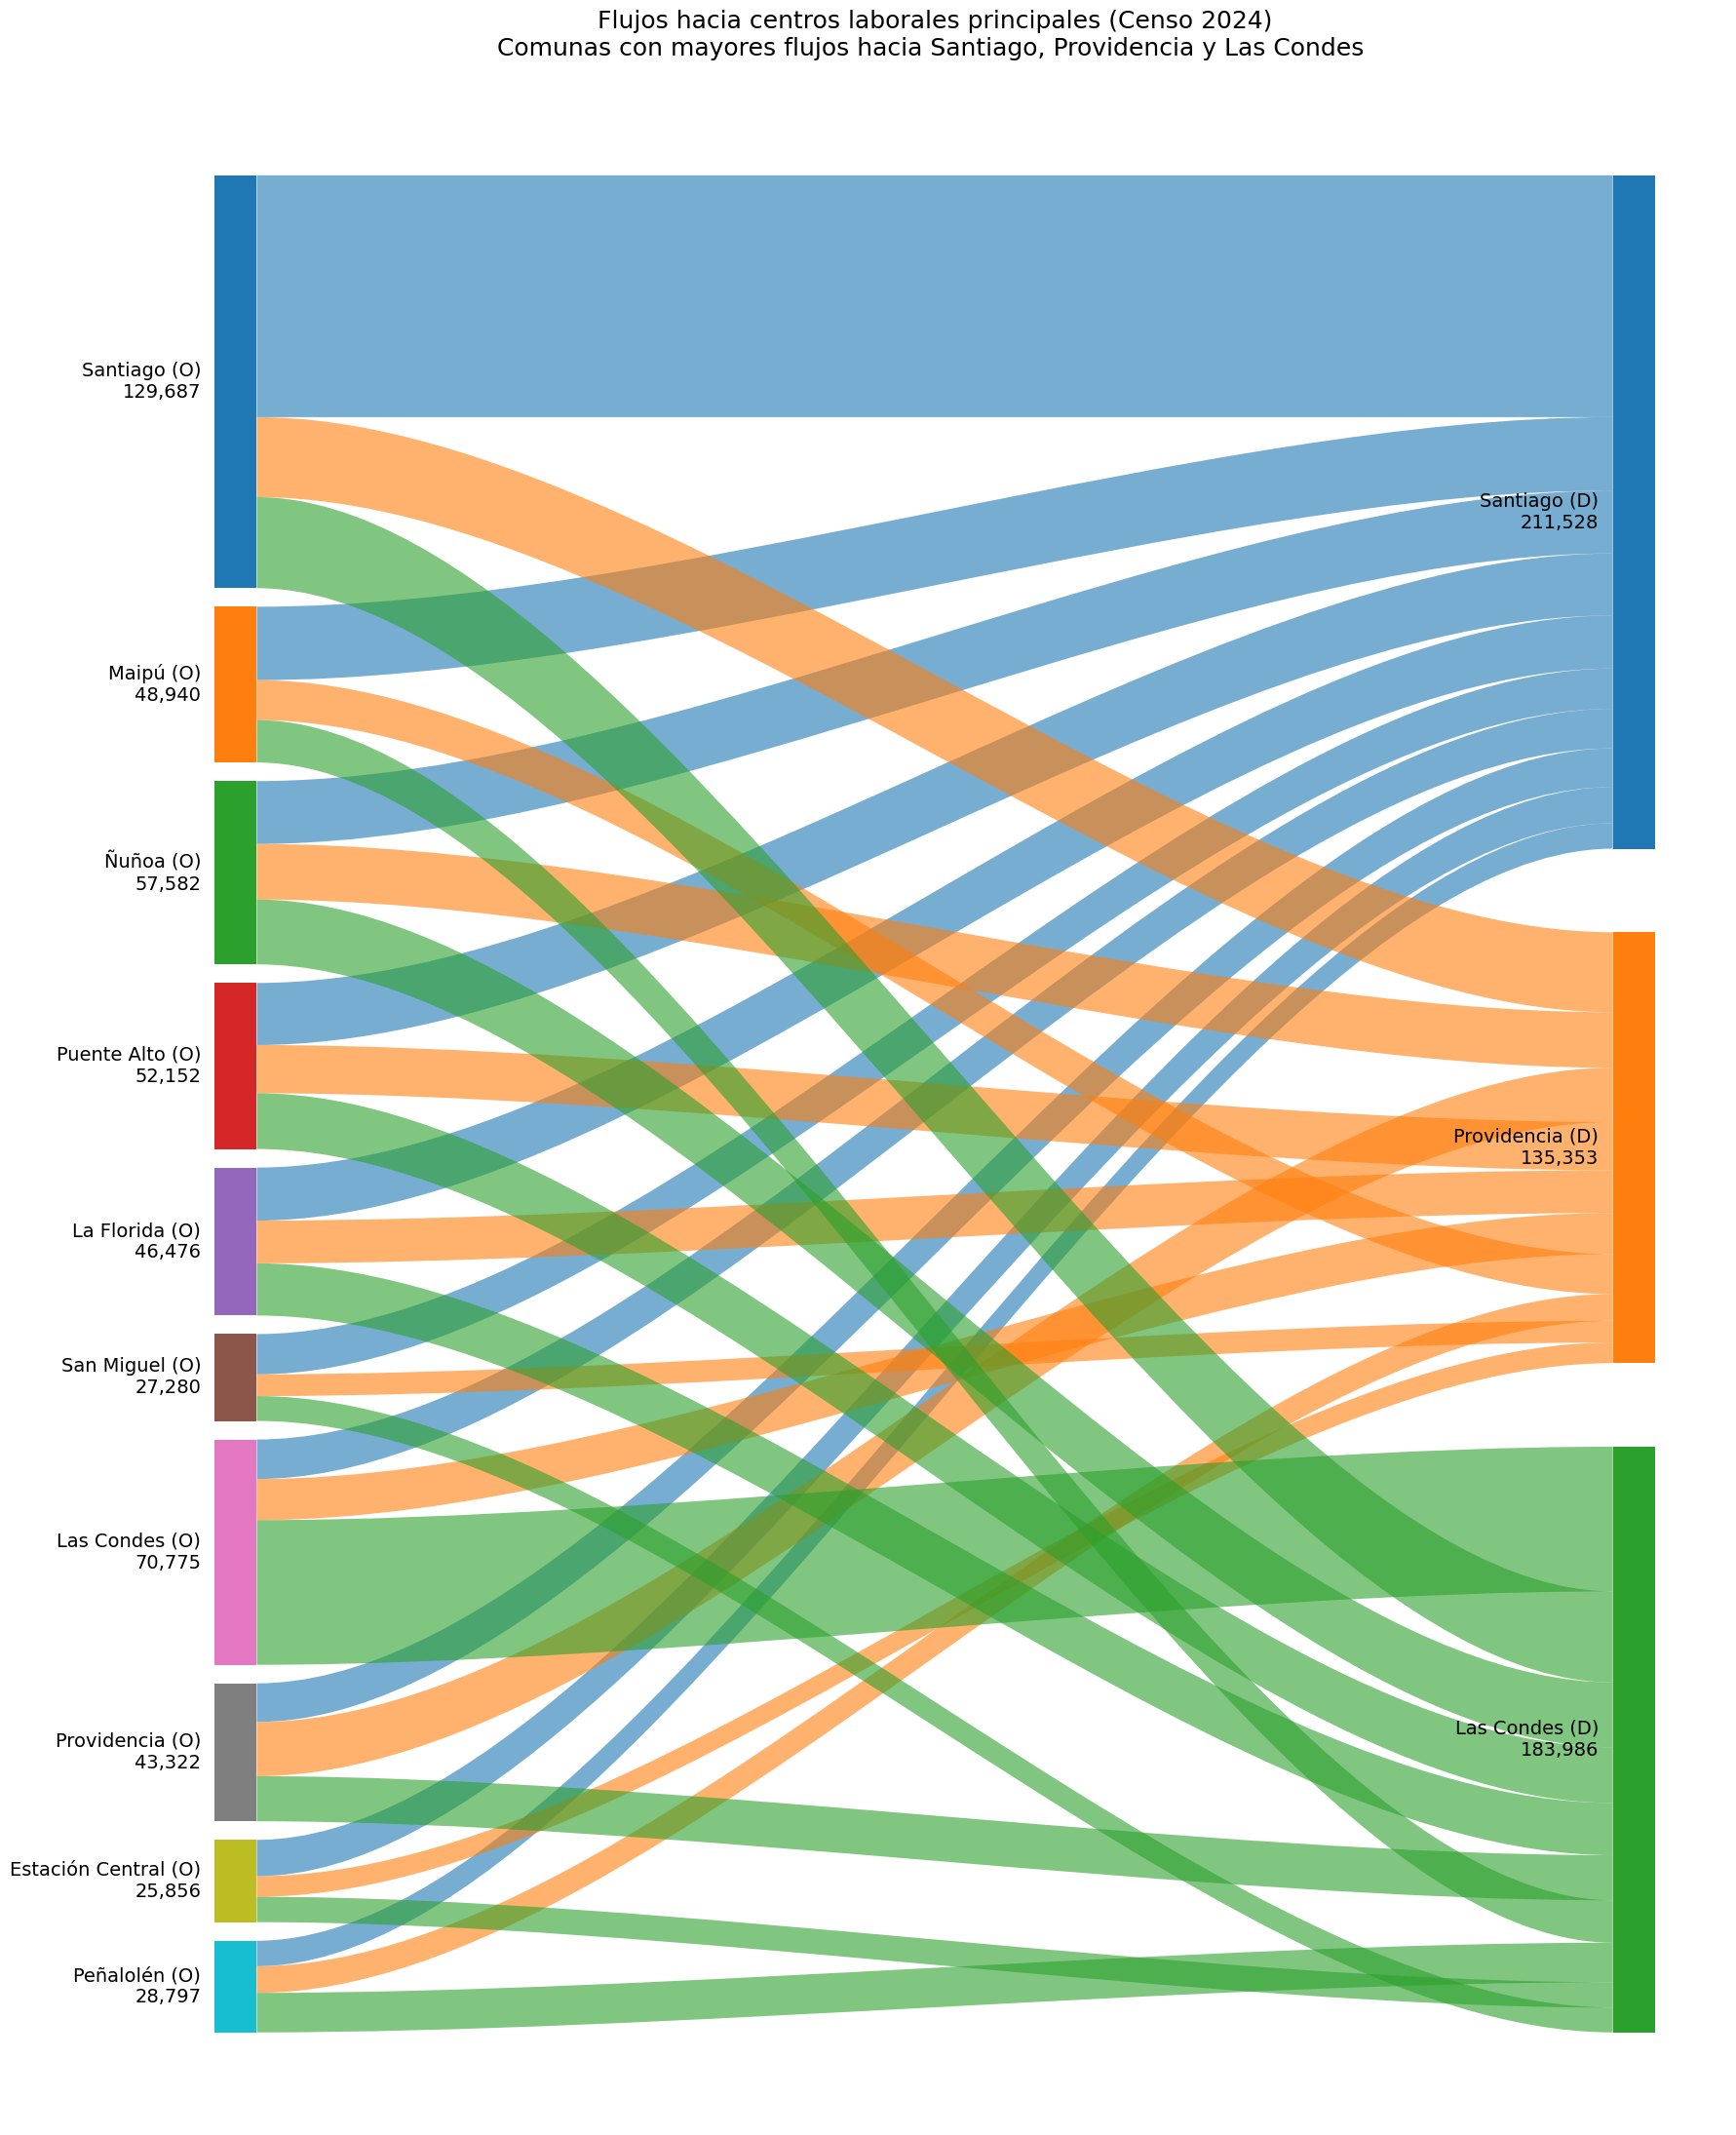

In [ ]:
centros_laborales = ['Santiago', 'Providencia', 'Las Condes']
flujo_hacia_centros = flujo_comunas_2024[
    flujo_comunas_2024['nombre_destino'].isin(centros_laborales)
].copy()
comunas_origen_top = flujo_hacia_centros.groupby('nombre_origen')['n_personas'].sum().nlargest(10).index.tolist()
flujo_trabajo = flujo_hacia_centros[
    flujo_hacia_centros['nombre_origen'].isin(comunas_origen_top)
].copy()
orden_destinos = {comuna: i for i, comuna in enumerate(centros_laborales)}
flujo_trabajo['orden_destino'] = flujo_trabajo['nombre_destino'].map(orden_destinos)
flujo_trabajo = flujo_trabajo.sort_values(['orden_destino', 'n_personas'], ascending=[True, False])
flujo_trabajo['nombre_origen_nodo'] = flujo_trabajo['nombre_origen'] + ' (O)'
flujo_trabajo['nombre_destino_nodo'] = flujo_trabajo['nombre_destino'] + ' (D)'
flows_trabajo = []
for _, row in flujo_trabajo.iterrows():
    flows_trabajo.append((row['nombre_origen_nodo'], row['nombre_destino_nodo'], row['n_personas']))
fig, ax = plt.subplots(figsize=(18, 22))
s = Sankey(flows=flows_trabajo, 
           flow_color_mode='dest',
           flow_color_mode_alpha=0.6,
           cmap=plt.cm.tab10)
s.draw()
plt.title('Flujos hacia centros laborales principales (Censo 2024)\nComunas con mayores flujos hacia Santiago, Providencia y Las Condes ', 
          fontsize=18, pad=20)
plt.tight_layout()
plt.show()

### Ejemplo con múltiples niveles (origen-medio de transporte-destino)

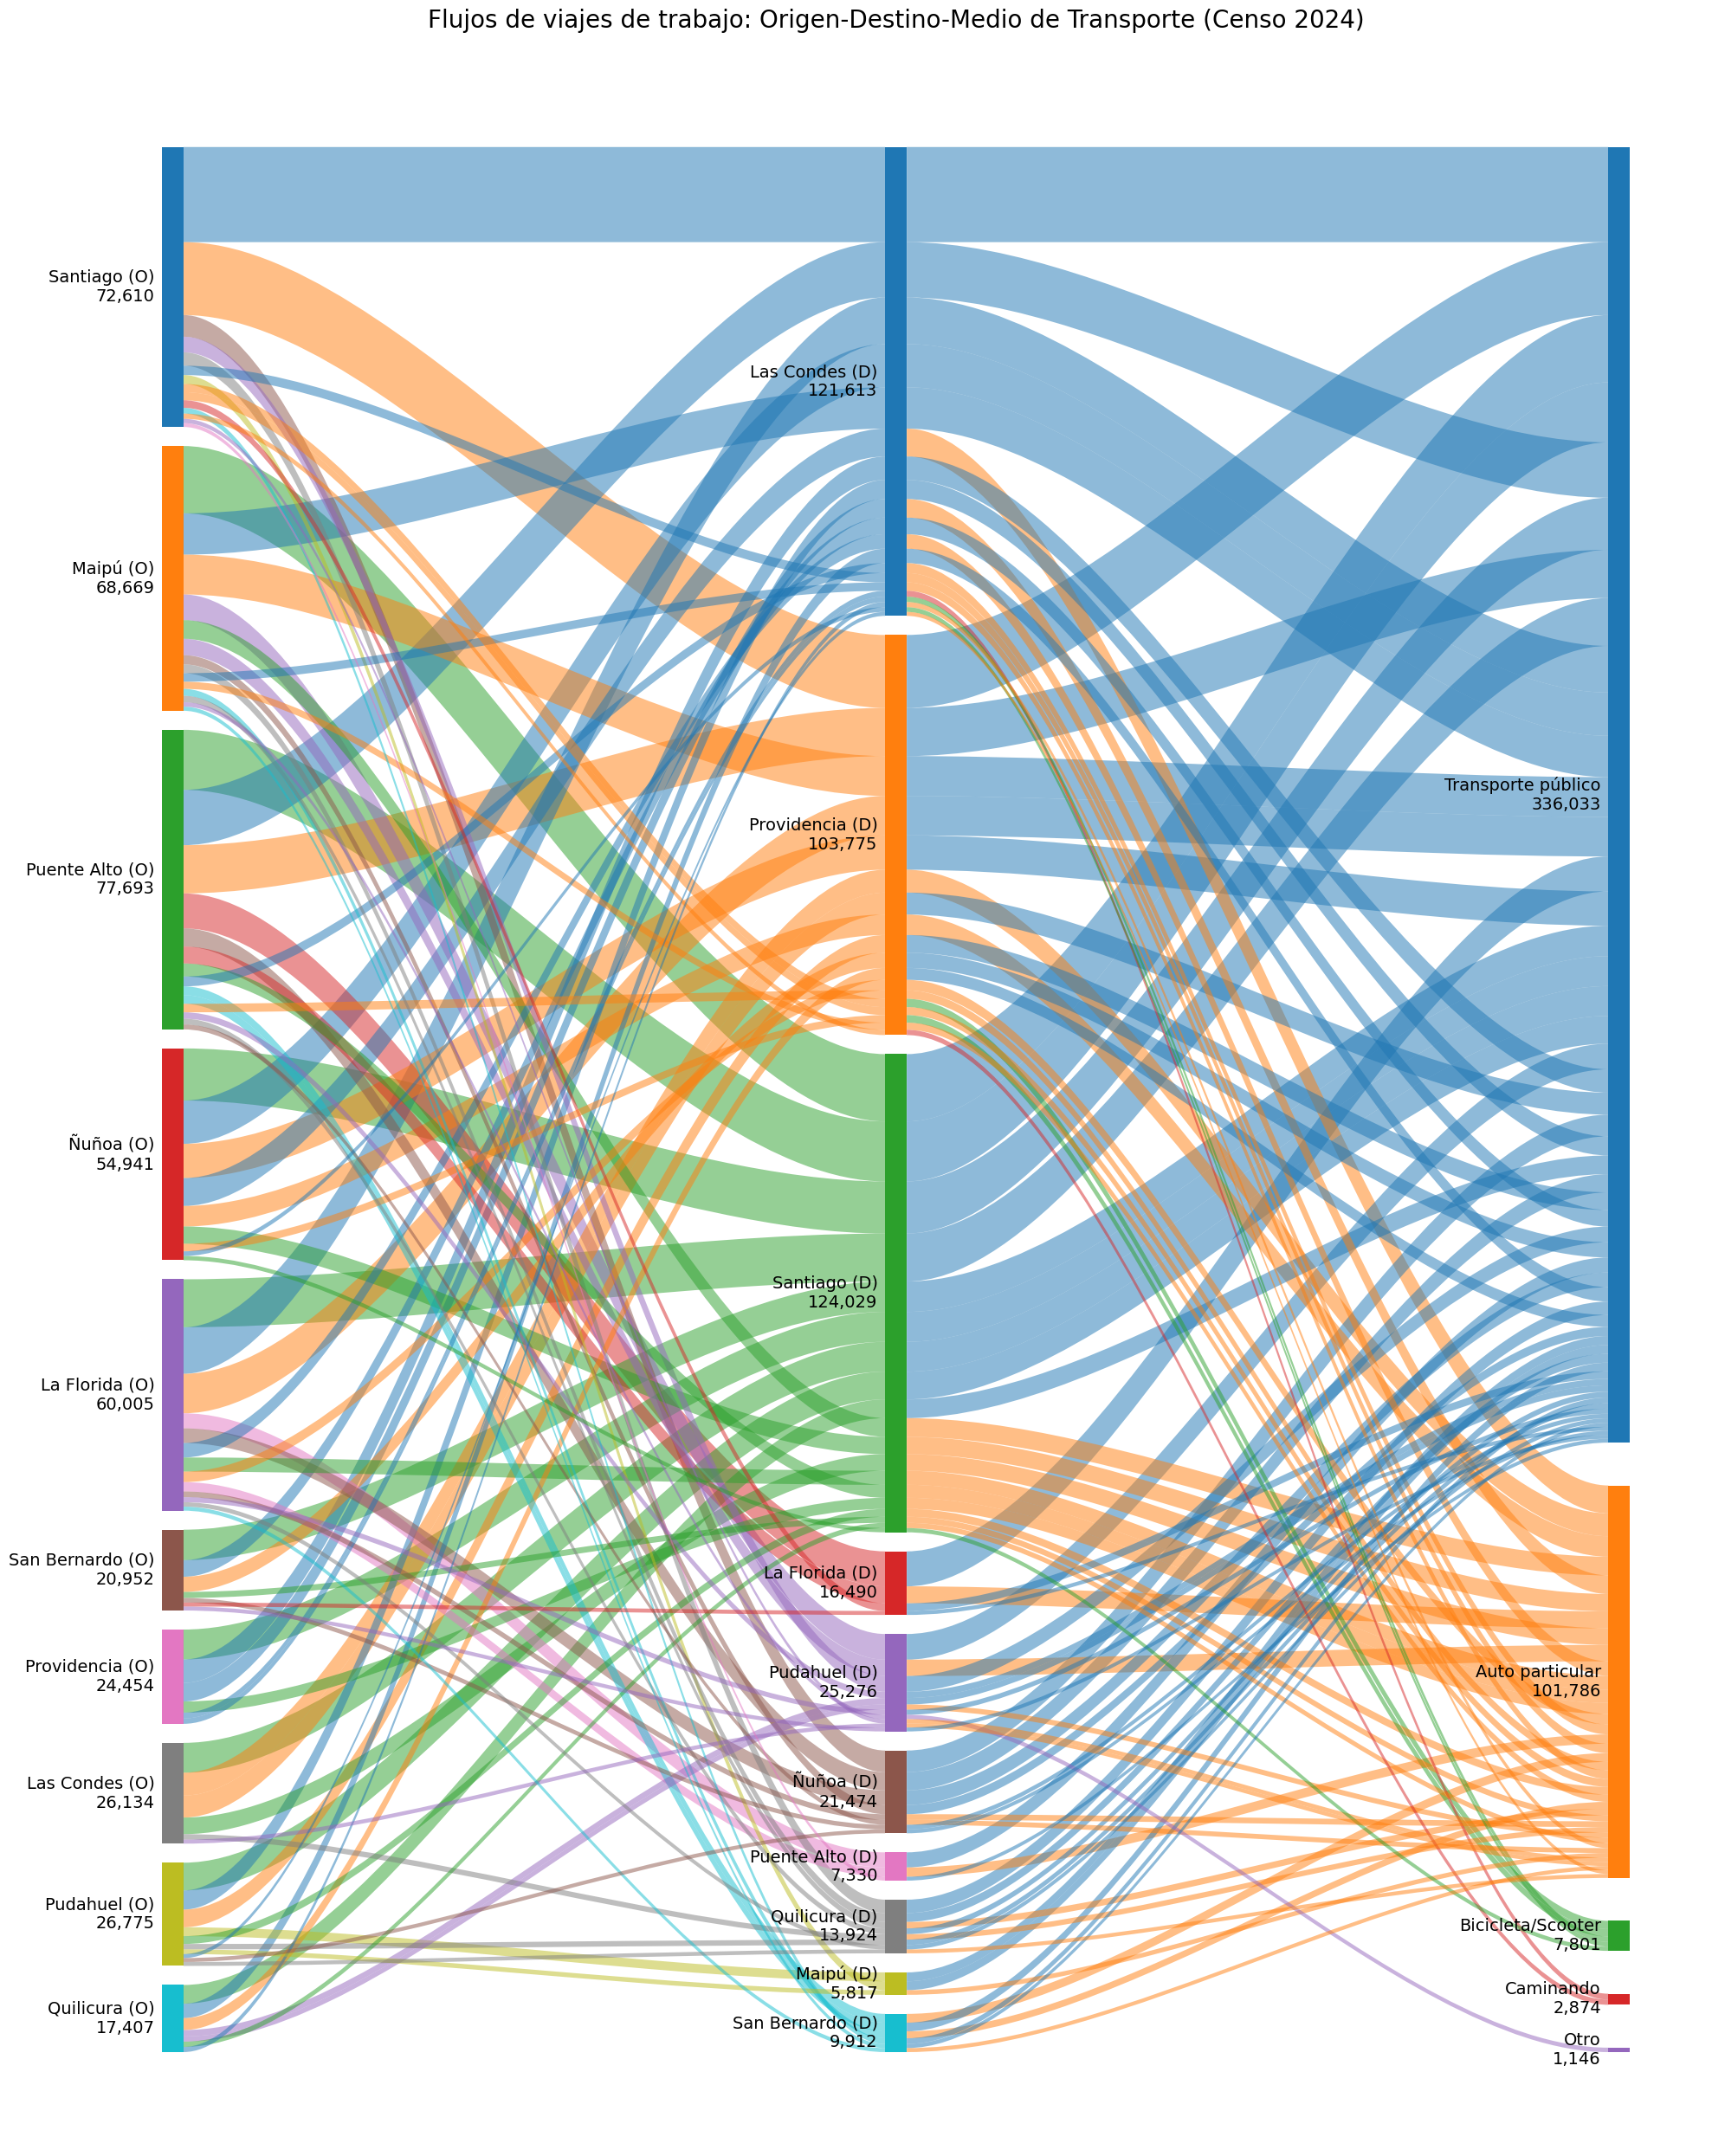

In [ ]:
flujo_medio_completo = EOD_2024.groupby(['nombre_origen', 'medio_transp', 'nombre_destino'])['n_personas'].sum().reset_index()
# Para considerar flujos dentro de misma comuna, comentar esta linea:
flujo_medio_completo = flujo_medio_completo[flujo_medio_completo['nombre_origen'] != flujo_medio_completo['nombre_destino']]
comunas_mas_flujos_medio = pd.concat([
    flujo_medio_completo.groupby('nombre_origen')['n_personas'].sum(),
    flujo_medio_completo.groupby('nombre_destino')['n_personas'].sum()
]).groupby(level=0).sum().nlargest(10).index.tolist()
flujo_medio = flujo_medio_completo[
    flujo_medio_completo['nombre_origen'].isin(comunas_mas_flujos_medio) &
    flujo_medio_completo['nombre_destino'].isin(comunas_mas_flujos_medio)
]
flujo_medio = flujo_medio.nlargest(100, 'n_personas')
medio_nombres= {
    1: 'Auto particular',
    2: 'Transporte público',
    3: 'Caminando',
    4: 'Bicicleta/Scooter',
    5: 'Motocicleta',
    6: 'Caballo/lancha/bote',
    7: 'Otro',
    -99: 'No respuesta'
}
flows_multinivel = []
for _, row in flujo_medio.iterrows():
    origen = row['nombre_origen'] + ' (O)'
    medio = medio_nombres.get(row['medio_transp'], f"Modo {row['medio_transp']}")
    destino = row['nombre_destino'] + ' (D)'
    valor = row['n_personas']
    flows_multinivel.append((origen, destino, valor))
    flows_multinivel.append((destino, medio, valor))
plt.figure(figsize=(20, 25))
s = Sankey(flows=flows_multinivel, 
           flow_color_mode='dest',
           flow_color_mode_alpha=0.5,
           cmap=plt.cm.tab10,
           node_opts=dict(label_format='{label}\n{value:,.0f}'))
s.draw()
plt.title('Flujos de viajes de trabajo: Origen-Destino-Medio de Transporte (Censo 2024)', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

### Ejemplo con segmentación por sexo

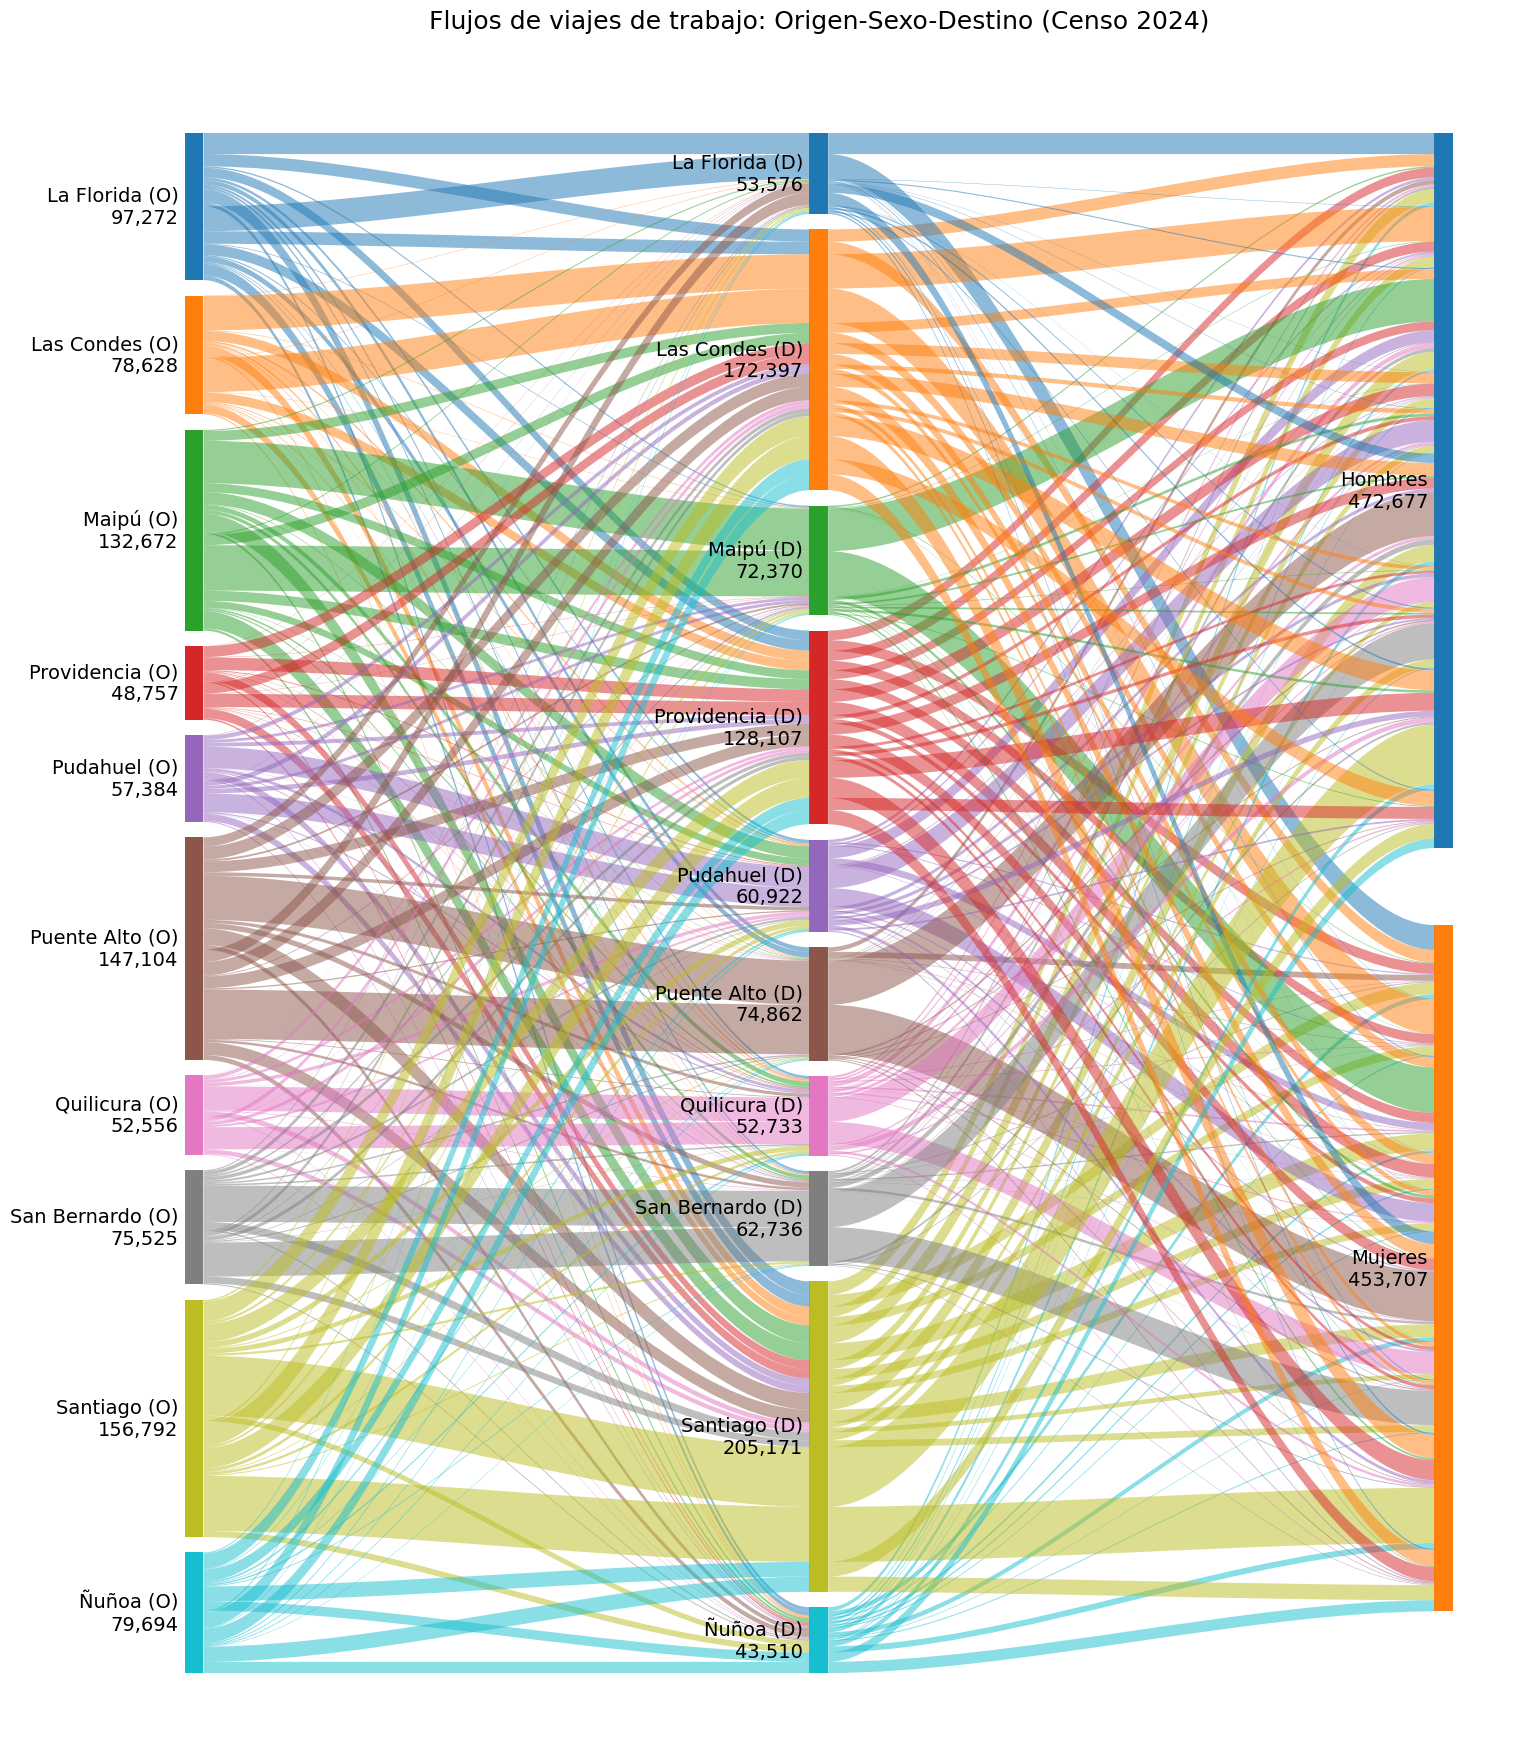

In [92]:
flujo_sexo_completo_2024 = EOD_2024.groupby(['nombre_origen', 'sexo', 'nombre_destino'])['n_personas'].sum().reset_index()
#flujo_sexo_completo_2024 = flujo_sexo_completo_2024[flujo_sexo_completo_2024['nombre_origen'] != flujo_sexo_completo_2024['nombre_destino']]
comunas_mas_flujos_sexo_2024 = pd.concat([
    flujo_sexo_completo_2024.groupby('nombre_origen')['n_personas'].sum(),
    flujo_sexo_completo_2024.groupby('nombre_destino')['n_personas'].sum()
]).groupby(level=0).sum().nlargest(10).index.tolist()
flujo_sexo_2024 = flujo_sexo_completo_2024[
    flujo_sexo_completo_2024['nombre_origen'].isin(comunas_mas_flujos_sexo_2024) &
    flujo_sexo_completo_2024['nombre_destino'].isin(comunas_mas_flujos_sexo_2024)
]
flujo_sexo_2024 = flujo_sexo_2024
sexo_nombres = {1: 'Hombres', 2: 'Mujeres'}
flows_sexo_2024 = []
for _, row in flujo_sexo_2024.iterrows():
    origen = row['nombre_origen'] + ' (O)'
    sexo = sexo_nombres[row['sexo']]
    destino = row['nombre_destino'] + ' (D)'
    valor = row['n_personas']
    flows_sexo_2024.append((origen, destino, valor))
    flows_sexo_2024.append((destino, sexo, valor))
fig, ax = plt.subplots(figsize=(18, 22))
s = Sankey(flows=flows_sexo_2024,
            cmap=plt.cm.tab10,
           flow_color_mode='source',
           flow_color_mode_alpha=0.5)
s.draw()
plt.title('Flujos de viajes de trabajo: Origen-Sexo-Destino (Censo 2024)', fontsize=18, pad=20)
plt.show()